# Weight Predication using Linear Regression

In [167]:
#1.Importing dependencies and Load data
#1.1 Importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [168]:
#1.2 Loading dataset
Data=pd.read_csv("weight-height.csv")
Data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
#2. Exploratory Data Analysis
#2.1 No of rows and columns
Data.shape

(10000, 3)

In [7]:
#2.2 Data type of each feature
Data.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [8]:
#2.3 Stastical Analysis of numerical feature
Data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


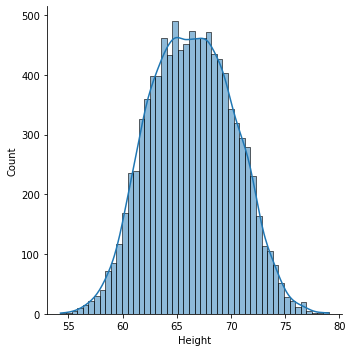

In [16]:
sns.displot(Data.Height,kde=True)

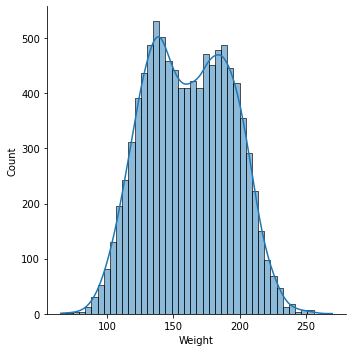

In [17]:
sns.displot(Data.Weight,kde=True)

In [18]:
#2.4 Information of dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [19]:
#2.5 Null value checking
Data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

<AxesSubplot:>

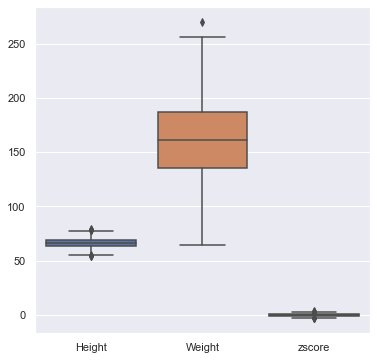

In [154]:
#2.6 Outlier detection using boxplot
sns.set(rc={"figure.figsize":(6,6)})
sns.boxplot(data=Data)

In [157]:
#1.9 Removal of outlieres using Z score method
Data['zscore']=(Data.Height-Data.Height.mean())/Data.Height.std()
Data2=Data[~((Data['zscore']>3) | (Data['zscore']<-3))]
Data2

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


<AxesSubplot:>

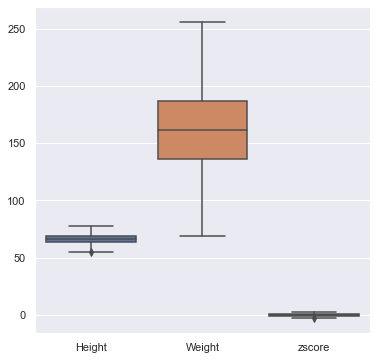

In [41]:
sns.boxplot(data=Data2)

In [161]:
Data2

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [48]:
Data2.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

<AxesSubplot:>

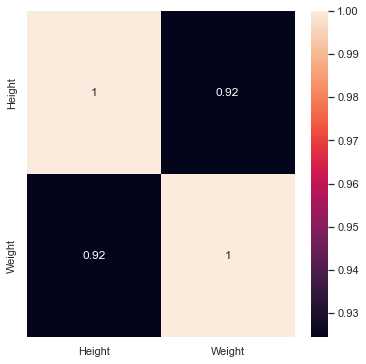

In [171]:
#2.8 Correlation between features
cor=Data2.corr()
sns.heatmap(cor,annot=True)

In [164]:
#3 Model Creation
#3.1 Selection of independent and dependent feature
a=abs(cor['Weight'])
result=a[a>0.5]
result

Height    0.924365
Weight    1.000000
Name: Weight, dtype: float64

In [165]:
# X is independent and y is dependent(target) feature
X=Data2['Height'].values.reshape(-1,1)
y=Data2['Weight'].values.reshape(-1,1)

In [98]:
#3.2 Splitting the data and train the model
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.3,random_state=3)
lm=LinearRegression()
model=lm.fit(X_train,y_train)

In [107]:
#3.3 Model testing
y_pred=model.predict(X_test)

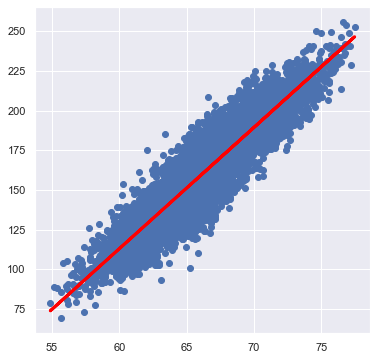

In [173]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,color='red',linewidth=3)

In [117]:
#3.4 Accuracy of Model
score=model.score(X_test,y_test)

In [118]:
score

0.855378433287636

In [119]:
# Coefficient value(value of m in y=mx+c )
model.coef_

array([[7.64720356]])

In [120]:
# Intercepet Value(value of c in y=mx+c)
model.intercept_

array([-345.83653342])

In [177]:
(7.64720356*76.48231871)-345.83653342

239.0393264961666

In [125]:
#testing model using test values
model.predict([[76.48],[68.25]])

array([[239.02159482],
       [176.08510952]])

In [128]:
#4 Model Evaluation
#4.1 Using R-Square method
r2=r2_score(y_test,y_pred)

In [129]:
r2

0.855378433287636

In [137]:
#4.2 Using Adjusted R- Square method
adj_r2 = 1-((1 - r2)*(len(Data2.columns)-1)/(len(Data2.columns)-len([X])-1))

In [138]:
adj_r2

0.7107568665752719

<AxesSubplot:>

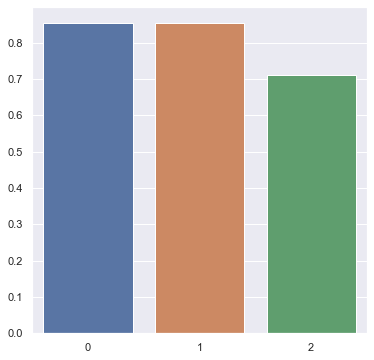

In [153]:
# Sccuracy,R-Square value,Adjusted R- Square value
sns.barplot(data=[[score],[r2],[adj_r2]])

Accuracy: 0.85
R-Square:0.85
Adjusted R-Square:0.71